In [2]:
import requests
import pandas as pd
from pprint import pprint

BASE_URL = "https://api.themoviedb.org/3"
TMDB_API_KEY = "key"

def tmdb_get(endpoint, params=None):
    """Helper pour appeler l'API TMDB (GET) et renvoyer du JSON."""
    if params is None:
        params = {}
    params["api_key"] = TMDB_API_KEY
    params["language"] = "fr-FR"  # tu peux changer en "en-US" si tu préfères

    url = f"{BASE_URL}{endpoint}"
    response = requests.get(url, params=params)
    response.raise_for_status()
    return response.json()



In [12]:
popular_movies = tmdb_get("/movie/popular", params={"page": 1})

# Regarder la structure brute
pprint(popular_movies.keys())
pprint(popular_movies["results"][0])


dict_keys(['page', 'results', 'total_pages', 'total_results'])
{'adult': False,
 'backdrop_path': '/5h2EsPKNDdB3MAtOk9MB9Ycg9Rz.jpg',
 'genre_ids': [16, 10751, 35, 12, 9648],
 'id': 1084242,
 'original_language': 'en',
 'original_title': 'Zootopia 2',
 'overview': "Suite du film d'animation Zootopie sorti en 2016.",
 'popularity': 531.3208,
 'poster_path': '/qq6MfHFDvBEzHhkE0Q5ozbkbde4.jpg',
 'release_date': '2025-11-26',
 'title': 'Zootopie 2',
 'video': False,
 'vote_average': 7.638,
 'vote_count': 181}


In [4]:
df_popular = pd.DataFrame(popular_movies["results"])

# On garde quelques colonnes utiles
cols = ["id", "title", "original_title", "release_date", "vote_average", "vote_count", "popularity"]
df_popular[cols].head(10)


,id,title,original_title,release_date,vote_average,vote_count,popularity
0,1084242,Zootopie 2,Zootopia 2,2025-11-26,7.638,181,531.3208
1,1033462,749 Bureau,749局,2024-10-01,5.714,42,396.6788
2,1419406,The Shadow's Edge,捕风追影,2025-08-16,6.374,127,370.3255
3,1309012,Altered,Altered,2025-09-18,6.500,40,320.3196
4,1363123,The Family Plan 2,The Family Plan 2,2025-11-11,6.734,244,263.2653
5,1448560,Wildcat,Wildcat,2025-11-19,6.361,18,223.9224
6,967941,Wicked : Partie II,Wicked: For Good,2025-11-19,6.761,332,221.9589
7,1196573,La place du mort,She Rides Shotgun,2025-07-31,7.100,94,202.9529
8,949709,High Forces,危机航线,2024-09-29,6.100,22,202.7770
9,1246049,Dracula,Dracula,2025-07-30,7.100,472,193.2672


In [5]:
def search_movie(query, page=1):
    return tmdb_get("/search/movie", params={"query": query, "page": page})

results = search_movie("Inception")
df_search = pd.DataFrame(results["results"])
df_search[["id", "title", "release_date", "vote_average"]].head()


,id,title,release_date,vote_average
0,27205,Inception,2010-07-15,8.37
1,250845,WWA The Inception,2001-10-26,3.10
2,542438,Bikini Inception,2015-05-19,4.00
3,64956,Inception: The Cobol Job,2010-12-07,7.30
4,973484,Inception: Music from the Motion Picture,2010-12-07,6.00


In [6]:
movie_id = int(df_search.iloc[0]["id"])
movie_details = tmdb_get(f"/movie/{movie_id}")
pprint(movie_details)


{'adult': False,
 'backdrop_path': '/s3TBrRGB1iav7gFOCNx3H31MoES.jpg',
 'belongs_to_collection': None,
 'budget': 160000000,
 'genres': [{'id': 28, 'name': 'Action'},
            {'id': 878, 'name': 'Science-Fiction'},
            {'id': 12, 'name': 'Aventure'}],
 'homepage': 'http://inceptionmovie.warnerbros.com/dvd/',
 'id': 27205,
 'imdb_id': 'tt1375666',
 'origin_country': ['US', 'GB'],
 'original_language': 'en',
 'original_title': 'Inception',
 'overview': "Dom Cobb est un voleur expérimenté, le meilleur dans l'art "
             "dangereux de l'extraction, voler les secrets les plus intimes "
             'enfouis au plus profond du subconscient durant une phase de '
             "rêve, lorsque l'esprit est le plus vulnérable. Les capacités de "
             'Cobb ont fait des envieux dans le monde tourmenté de '
             "l'espionnage industriel alors qu'il devient fugitif en perdant "
             "tout ce qu'il a un jour aimé. Une chance de se racheter lui est "
         

In [7]:
top_rated = tmdb_get("/movie/top_rated", params={"page": 1})
df_top = pd.DataFrame(top_rated["results"])
df_top[["title", "release_date", "vote_average"]].head(10)


,title,release_date,vote_average
0,Les Évadés,1994-09-23,8.712
1,Le Parrain,1972-03-14,8.684
2,"Le Parrain, 2e partie",1974-12-20,8.570
3,La Liste de Schindler,1993-12-15,8.566
4,12 Hommes en colère,1957-04-10,8.548
5,Le Voyage de Chihiro,2001-07-20,8.535
6,The Dark Knight : Le Chevalier noir,2008-07-16,8.525
7,Dilwale Dulhania Le Jayenge,1995-10-20,8.500
8,La Ligne verte,1999-12-10,8.503
9,Parasite,2019-05-30,8.496


In [8]:
trending = tmdb_get("/trending/movie/week")
df_trending = pd.DataFrame(trending["results"])
df_trending[["title", "release_date", "vote_average"]].head(10)


,title,release_date,vote_average
0,Zootopie 2,2025-11-26,7.600
1,Bugonia,2025-10-23,7.600
2,Wicked : Partie II,2025-11-19,6.800
3,The Family Plan 2,2025-11-11,6.742
4,Train Dreams,2025-11-05,7.331
5,Vive le vol d'hiver,2025-11-25,5.978
6,xXx,2002-08-09,5.976
7,Predator: Badlands,2025-11-05,7.414
8,Frankenstein,2025-10-17,7.774
9,Regretting You,2025-10-22,7.100


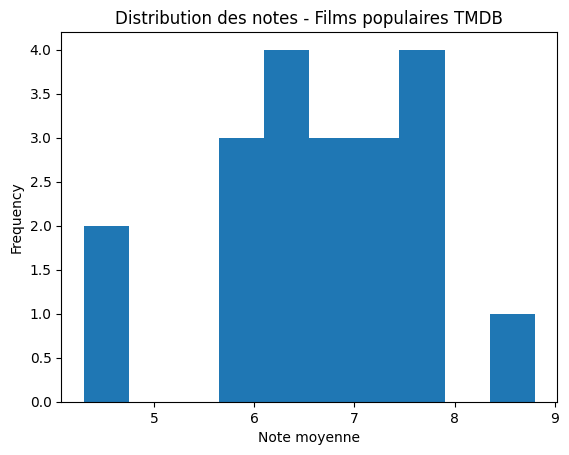

In [10]:
import matplotlib.pyplot as plt

df_popular["vote_average"].plot(kind="hist", bins=10)
plt.xlabel("Note moyenne")
plt.title("Distribution des notes - Films populaires TMDB")
plt.show()


In [13]:
def get_popular_movies(page_limit=3):
    """Récupère plusieurs pages de films populaires pour les KPIs / stats globales."""
    all_results = []
    for page in range(1, page_limit + 1):
        data = tmdb_get("/movie/popular", params={"page": page})
        all_results.extend(data["results"])
    df = pd.DataFrame(all_results)
    return df

df_popular = get_popular_movies(page_limit=3)

kpis_overview = {
    "nb_films": df_popular["id"].nunique(),
    "note_moyenne": df_popular["vote_average"].mean(),
    "popularite_moyenne": df_popular["popularity"].mean(),
    "date_plus_recente": df_popular["release_date"].max(),
    "date_plus_ancienne": df_popular["release_date"].min(),
}

kpis_overview


{'nb_films': 59,
 'note_moyenne': np.float64(6.6277333333333335),
 'popularite_moyenne': np.float64(122.96811000000001),
 'date_plus_recente': '2025-11-27',
 'date_plus_ancienne': '1928-01-15'}

In [14]:
def get_top_movies_for_table(df, min_votes=500, top_n=20):
    df_filtered = df[df["vote_count"] >= min_votes].copy()
    df_sorted = df_filtered.sort_values(
        by=["vote_average", "vote_count"], ascending=[False, False]
    )
    cols = ["id", "title", "release_date", "vote_average", "vote_count", "popularity"]
    return df_sorted[cols].head(top_n)

df_top_table = get_top_movies_for_table(df_popular, min_votes=200, top_n=20)
df_top_table.head()


,id,title,release_date,vote_average,vote_count,popularity
26,803796,KPop Demon Hunters,2025-06-20,8.211,1964,95.2862
30,1218925,Chainsaw Man – Le Film : L'arc de Reze,2025-09-19,7.846,224,81.2750
10,1062722,Frankenstein,2025-10-17,7.774,1967,192.5480
23,269149,Zootopie,2016-02-11,7.754,17143,113.7735
19,701387,Bugonia,2025-10-23,7.600,513,129.8461


In [15]:
# 1. Récupérer la liste des genres
genres_data = tmdb_get("/genre/movie/list")
genres_map = {g["id"]: g["name"] for g in genres_data["genres"]}

# 2. Exploser les genres par film
def explode_genres(df):
    df = df.copy()
    df["genre_ids"] = df["genre_ids"].apply(lambda x: x if isinstance(x, list) else [])
    df_exploded = df.explode("genre_ids")
    df_exploded["genre_name"] = df_exploded["genre_ids"].map(genres_map)
    return df_exploded

df_popular_genres = explode_genres(df_popular)

# 3. Agréger pour un donut / bar chart
df_genre_counts = (
    df_popular_genres
    .groupby("genre_name")["id"]
    .nunique()
    .reset_index(name="nb_films")
    .sort_values("nb_films", ascending=False)
)

df_genre_counts


,genre_name,nb_films
0,Action,31
14,Thriller,19
2,Aventure,14
9,Horreur,13
4,Crime,13
3,Comédie,11
5,Drame,10
13,Science-Fiction,9
7,Fantastique,9
12,Romance,8


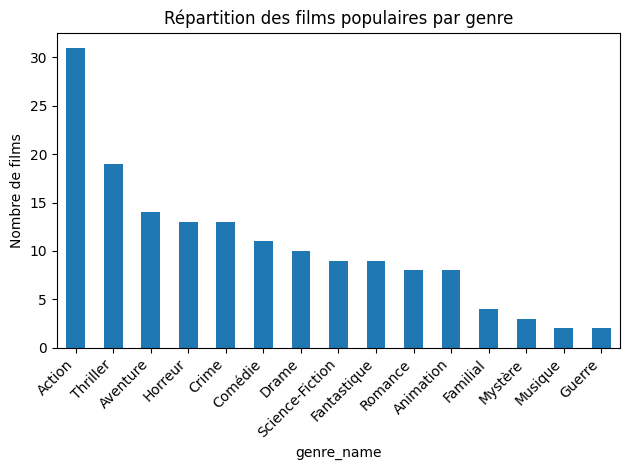

In [16]:
df_genre_counts.set_index("genre_name")["nb_films"].plot(kind="bar")
plt.ylabel("Nombre de films")
plt.title("Répartition des films populaires par genre")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


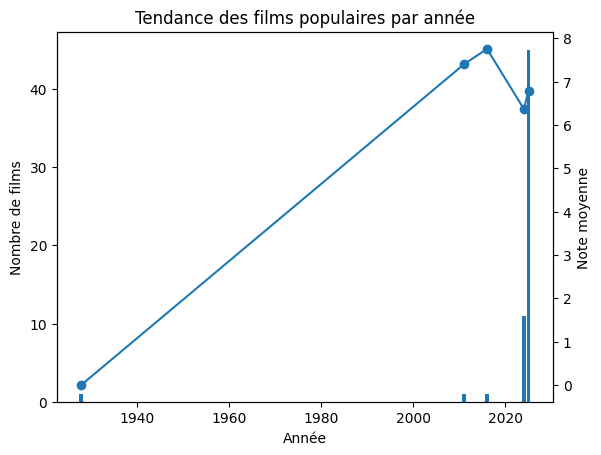

In [17]:
df_popular_dates = df_popular.copy()
df_popular_dates = df_popular_dates[df_popular_dates["release_date"].notna()].copy()
df_popular_dates["year"] = df_popular_dates["release_date"].str[:4].astype(int)

df_trend_year = (
    df_popular_dates
    .groupby("year")
    .agg(
        nb_films=("id", "nunique"),
        note_moyenne=("vote_average", "mean"),
    )
    .reset_index()
    .sort_values("year")
)

df_trend_year
fig, ax1 = plt.subplots()

ax1.bar(df_trend_year["year"], df_trend_year["nb_films"])
ax1.set_xlabel("Année")
ax1.set_ylabel("Nombre de films")

ax2 = ax1.twinx()
ax2.plot(df_trend_year["year"], df_trend_year["note_moyenne"], marker="o")
ax2.set_ylabel("Note moyenne")

plt.title("Tendance des films populaires par année")
plt.show()


In [18]:
def get_movie_credits(movie_id):
    return tmdb_get(f"/movie/{movie_id}/credits")

def build_cast_stats(df_movies, max_movies=30):
    cast_rows = []
    sample = df_movies.head(max_movies)

    for _, row in sample.iterrows():
        movie_id = row["id"]
        title = row["title"]
        credits = get_movie_credits(movie_id)
        for person in credits.get("cast", []):
            cast_rows.append({
                "movie_id": movie_id,
                "movie_title": title,
                "cast_id": person["id"],
                "actor_name": person["name"],
                "character": person.get("character"),
                "order": person.get("order"),
            })
    df_cast = pd.DataFrame(cast_rows)
    return df_cast

df_cast = build_cast_stats(df_popular, max_movies=30)

df_top_actors = (
    df_cast.groupby("actor_name")["movie_id"]
    .nunique()
    .reset_index(name="nb_films_populaires")
    .sort_values("nb_films_populaires", ascending=False)
    .head(20)
)

df_top_actors


,actor_name,nb_films_populaires
17,Alan Tudyk,3
649,Raymond S. Persi,2
747,Takahiro Sakurai,2
788,Tzvetan Cholev,2
671,Ron Perlman,2
879,李晨,2
574,Nate Torrence,2
330,Jason Bateman,2
100,Bonnie Hunt,2
310,Jackie Chan,2


In [19]:
def search_movie(query, page=1):
    data = tmdb_get("/search/movie", params={"query": query, "page": page})
    df = pd.DataFrame(data["results"])
    return df

# Exemple : rechercher "Batman"
df_search_batman = search_movie("Batman")
df_search_batman[["id", "title", "release_date", "vote_average"]].head()


,id,title,release_date,vote_average
0,268,Batman,1989-06-21,7.236
1,2661,Batman : Le film,1966-07-30,6.404
2,125249,Batman,1943-07-16,6.400
3,1535095,Batman,,0.000
4,209112,Batman v Superman : L'Aube de la Justice,2016-03-23,5.988
